In [1]:
import os,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy.stats import linregress

# Statistical analyses

In [2]:
path = "C:\Users\sternheimam\Desktop\my-notebook\user-csvs_predictions123"

In [3]:
path_out = r"C:\Users\sternheimam\Dropbox\TNO\Scriptie\6. Report\figures\matrix_analyses"

#### how many users are in the set?

In [3]:
len(os.listdir(path))

428

#### how many active hours, in total and on average?

In [4]:
files = []
for filename in os.listdir(path):
    files.append(pd.read_csv(os.path.join(path, filename)))

In [5]:
files_length = []
for f in files:
    files_length.append(len(f))
print np.median(files_length)
print np.mean(files_length)
print np.std(files_length)
print np.sum(files_length)

1169.5
1406.2897196261683
1057.2544478338257
601892


median is better than mean, here, because it is a very skewed distribution. As can also be observed in the plot below

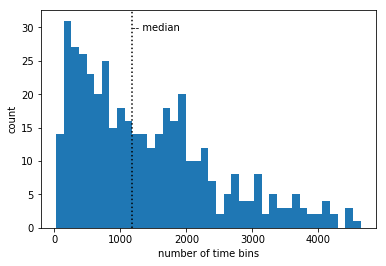

In [6]:
plt.hist(files_length,40)
plt.axvline(np.median(files_length),color="k",linestyle=":")
plt.xlabel("number of time bins")
plt.ylabel("count")
plt.text(np.median(files_length), 30, "-- median", va='center',ha='left')
plt.show()

### comparisons of variables. First: an idea of every variable by itself

In [5]:
data = pd.concat(files)
#data['Date & Time'] = [(datetime.strptime(d, '%Y-%m-%d %H:%M:%S')-datetime(1970,1,1)).total_seconds() for d in data["Date & Time"]]
data = data.drop('Date & Time',1)
#data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data))

##### Churn variables

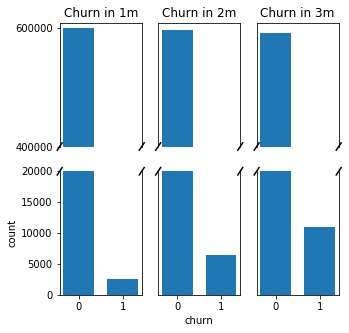

In [402]:
churnvars = ["Churn in 1m", "Churn in 2m", "Churn in 3m"]*2
f, axs = plt.subplots(2, 3,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(churnvars)):
    axs[i].hist(data[churnvars[i]],[0,1,2],rwidth=0.7,align="left")
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=2:
        axs[i].set_title(churnvars[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,20000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left
    if i in [1,2,4,5]:
        axs[i].set_yticks([])

axs[3].set_ylabel("count")
axs[4].set_xlabel("churn")
plt.show()

##### other variables

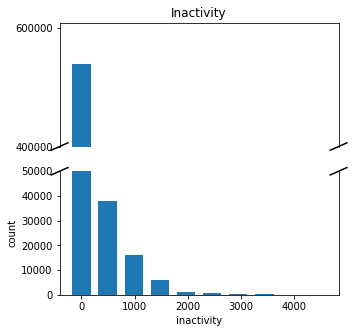

In [392]:
feature = ["Inactivity"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,50000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("inactivity")
plt.show()

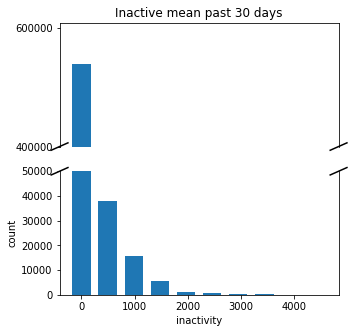

In [393]:
feature = ["Inactive mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,50000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("inactivity")
plt.show()

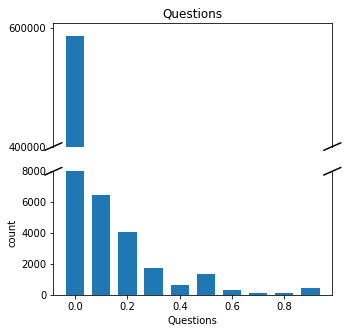

In [257]:
feature = ["Questions"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,8000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Questions")
plt.show()

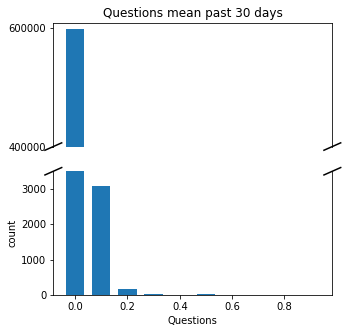

In [400]:
feature = ["Questions mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,3500)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Questions")
plt.show()

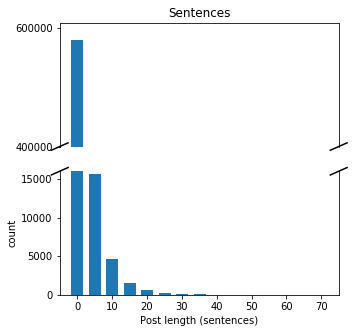

In [355]:
feature = ["Sentences"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],198,rwidth=0.7,align="left")
    axs[i].set_xlim(-5,75)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,16000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Post length (sentences)")
plt.show()

note: there is one outlier at about 900

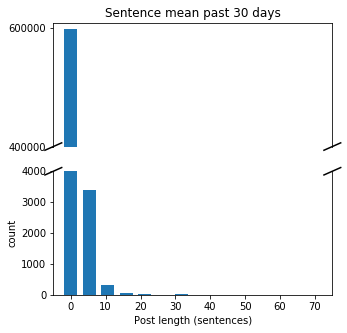

In [361]:
feature = ["Sentence mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],14,rwidth=0.7,align="left")
    axs[i].set_xlim(-5,75)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,4000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Post length (sentences)")
plt.show()

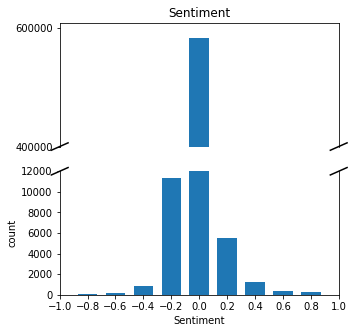

In [274]:
feature = ["Sentiment"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],10,rwidth=0.7,align="left")
    axs[i].set_xlim(-1,1)
    axs[i].set_xticks(np.arange(-1,1.01,0.2))
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,12000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Sentiment")
plt.show()

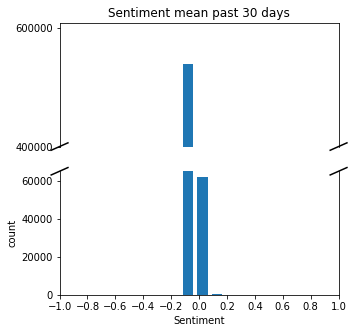

In [376]:
feature = ["Sentiment mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],10,rwidth=0.7,align="left")
    axs[i].set_xlim(-1,1)
    axs[i].set_xticks(np.arange(-1,1.01,0.2))
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,65000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Sentiment")
plt.show()

It looks as if a lot of information is lost by taking the average values

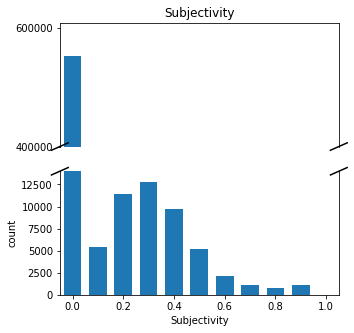

In [377]:
feature = ["Subjectivity"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    axs[i].set_xticks(np.arange(0,1.1,0.2))
    axs[i].set_xlim(-0.05,1.05)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,14000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Subjectivity")
plt.show()

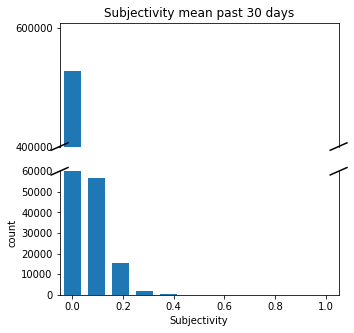

In [382]:
feature = ["Subjectivity mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],rwidth=0.7,align="left")
    axs[i].set_xticks(np.arange(0,1.1,0.2))
    axs[i].set_xlim(-0.05,1.05)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,60000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Subjectivity")
plt.show()

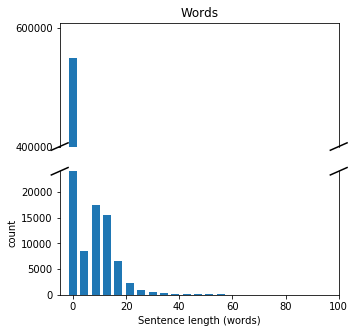

In [384]:
feature = ["Words"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],100,rwidth=0.7,align="left")
    axs[i].set_xlim(-5,100)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,24000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Sentence length (words)")
plt.show()

there is an outlier at about 400

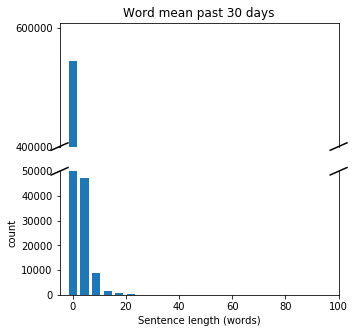

In [388]:
feature = ["Word mean past 30 days"]*2
f, axs = plt.subplots(2, 1,figsize=(5,5))
d = 0.03
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].hist(data[feature[i]],60,rwidth=0.7,align="left")
    axs[i].set_xlim(-5,100)
    #axs[i].text(0, 90000,str(len(data[churnvars[i]])-sum(data[churnvars[i]])), ha="center",size = "smaller")
    #axs[i].text(1, 90000,str(sum(data[churnvars[i]])), ha="center",size = "smaller")
    if i<=0:
        axs[i].set_title(feature[i])
        axs[i].spines['bottom'].set_visible(False)
        axs[i].set_yticks(np.arange(0,len(data),200000))
        axs[i].set_ylim(400000,608000)
        axs[i].set_xticks([])
        axs[i].plot((1-d,1+d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom right
        axs[i].plot((-d,d),(-d,d), "k" ,transform=axs[i].transAxes, clip_on=False) # bottom left
    else:
        axs[i].spines['top'].set_visible(False)
        axs[i].set_ylim(0,50000)
        axs[i].plot((1-d,1+d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top right
        axs[i].plot((-d,d),(1-d,1+d), "k" ,transform=axs[i].transAxes, clip_on=False) # top left

axs[1].set_ylabel("count")
axs[1].set_xlabel("Sentence length (words)")
plt.show()

### Second: Correlations between variables

In [17]:
def plot_correlation(X,Y):
    x = X
    y = Y

    _, _, r_value, p_value, _ = linregress(x,y)
    #print "r = %.3f, p = %.3f" %(r_value,p_value)
    
    plt.scatter(x,y,facecolors='none', edgecolors='k',label = 'r = %.3f, p = %.3f'%(r_value, p_value))
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(loc='upper right')

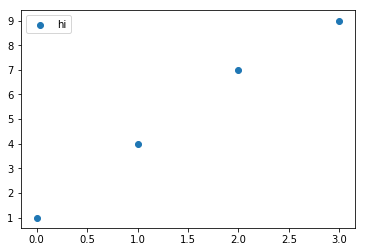

In [5]:
plt.close()
y = [1,4,7,9]
plt.scatter(range(len(y)),y,label = 'hi')
plt.legend()
plt.show()

In [7]:
N = len(data)
df = N-2
print df

601890


calculating the critical t value

In [49]:
r = 0.5
N = 10
print "r = %.2f, N = %i, df = %i" %(r,N,df)
r_squared = r**2
df = N-2
lower = 1-r_squared
t = r*(np.sqrt(df/lower))
print "N-2 / 1-r^2 = %.2f" % t
#t = r * np.sqrt(breuk)

r = 0.50, N = 10, df = 8
N-2 / 1-r^2 = 1.63


In [51]:
t_squared = t**2
r_critical = np.sqrt(t_squared/(t_squared+df))
print r_critical

0.5


calculating the p-value ..?

In [ ]:
e = np.e
pi = np.pi
pi_2sqrt = np.sqrt(2*pi)

r = -0.058764
r2 = r**2
r2_neg = 1-r2
n = 601892

df = n-2

sqrt = np.sqrt(r2_neg/df)

t = r/sqrt
t2= t**2
lower = sqrt * pi_2sqrt

upper_part = -0.5*(t2)
upper = e**upper_part

print upper/lower

alle variabelen zijn significant met elkaar gecorreleerd.... want er is een enorme hoeveelheid samples

In [33]:
collist = list(data.columns)
print collist

['Churn in 1m', 'Churn in 2m', 'Churn in 3m', 'Inactivity', 'Questions', 'Sentences', 'Sentiment', 'Subjectivity', 'Words', 'Sentence mean past 30 days', 'Word mean past 30 days', 'Inactive mean past 30 days', 'Questions mean past 30 days', 'Sentiment mean past 30 days', 'Subjectivity mean past 30 days']


In [19]:
path_out = r".\output"

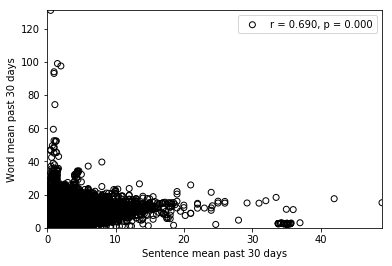

saved


In [26]:
plt.close()
col_x = str("Sentence mean past 30 days")
col_y = str("Word mean past 30 days")

name = "%s-%s"%(col_x.replace(" ", "_"),col_y.replace(" ", "_"))

x = data[col_x]
y = data[col_y]

plot_correlation(x,y)
plt.xlim(0,sorted(x)[-2])
plt.ylim(0,sorted(y)[-2])
plt.show()

#plt.savefig("%s.png"%name,bbox_inches='tight')
print "saved"

In [7]:
import seaborn as sns
sns.set(color_codes=True)

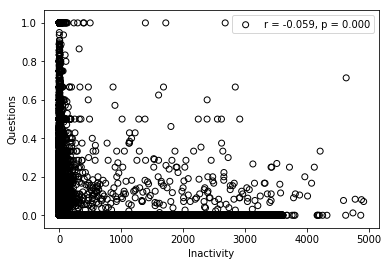

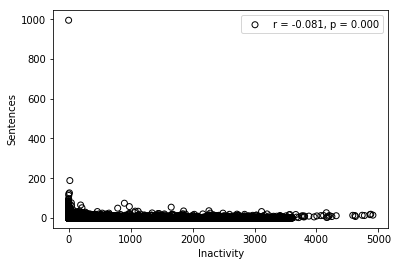

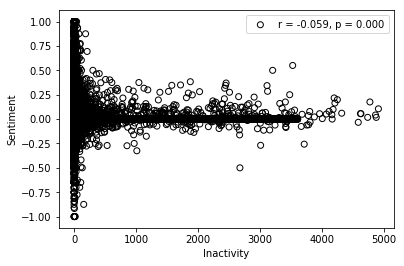

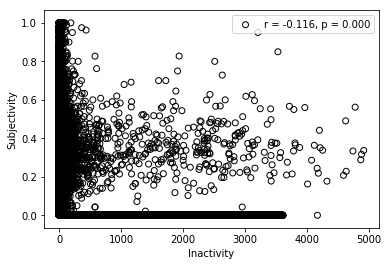

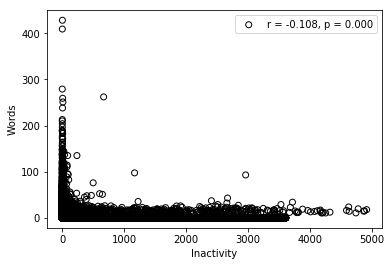

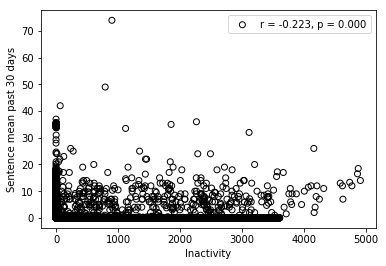

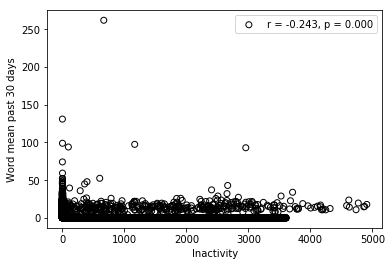

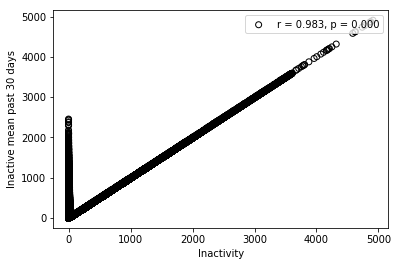

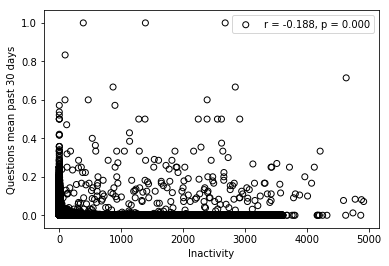

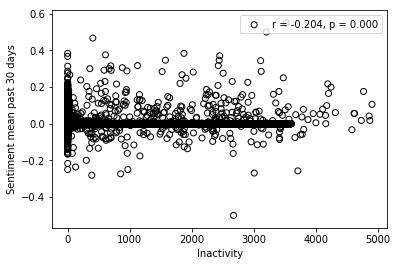

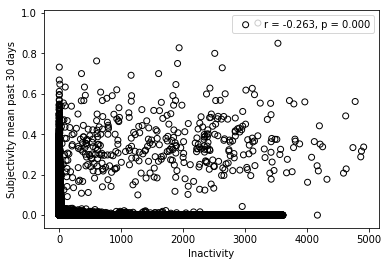

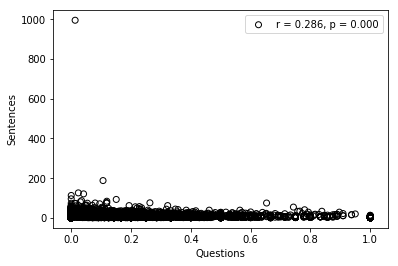

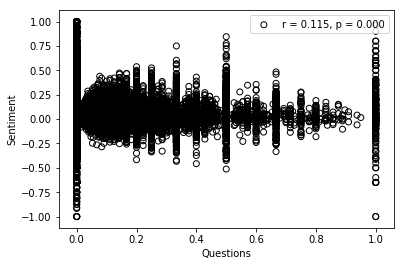

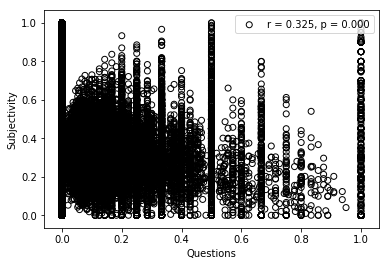

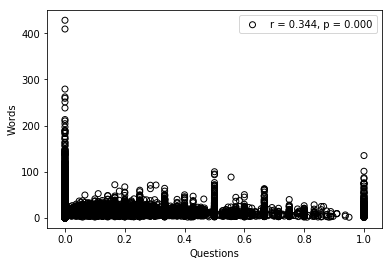

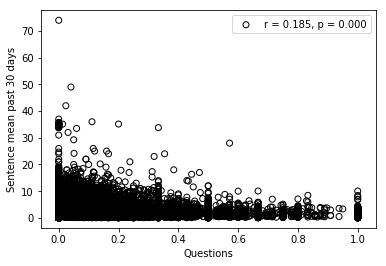

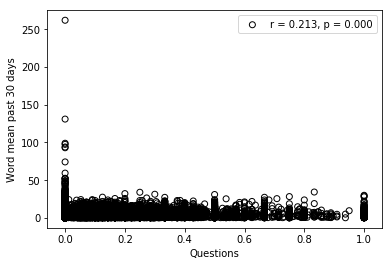

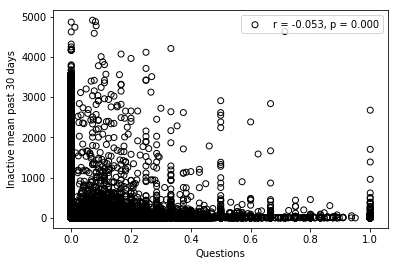

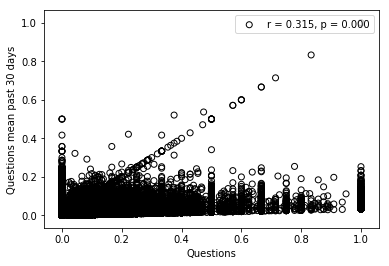

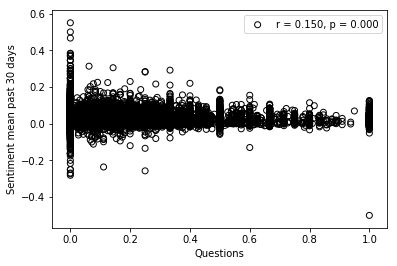

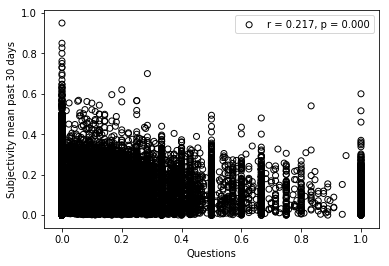

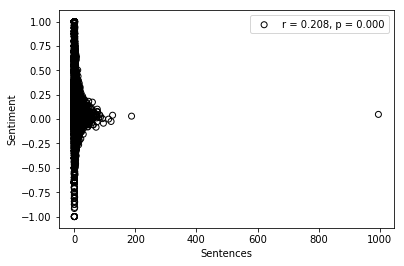

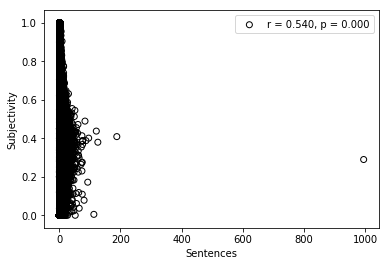

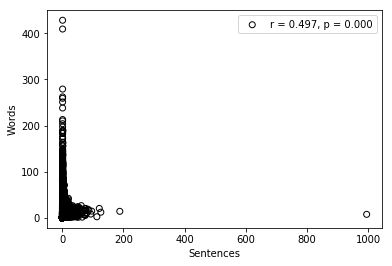

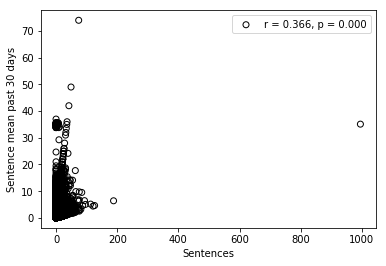

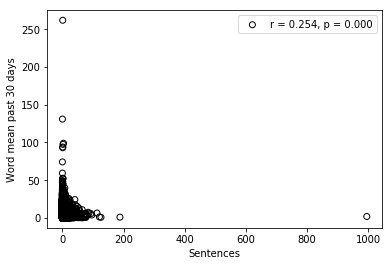

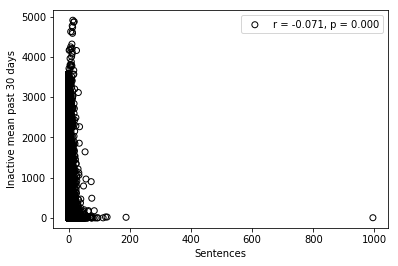

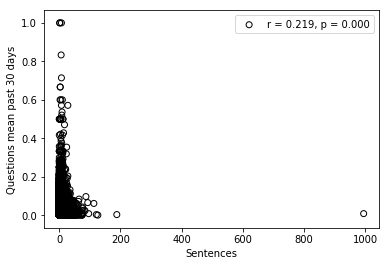

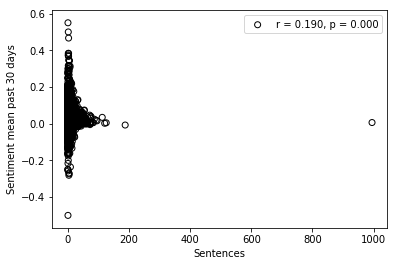

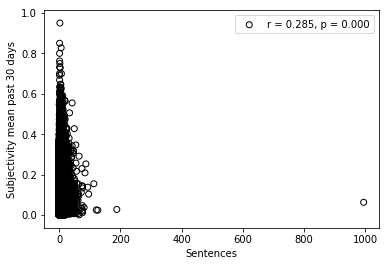

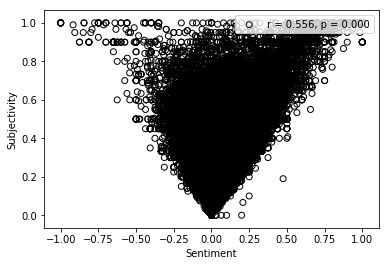

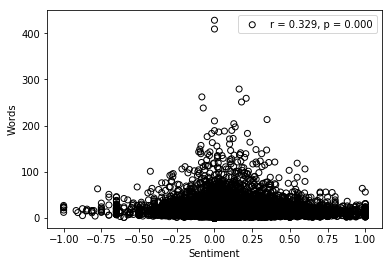

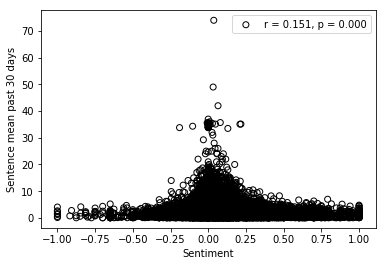

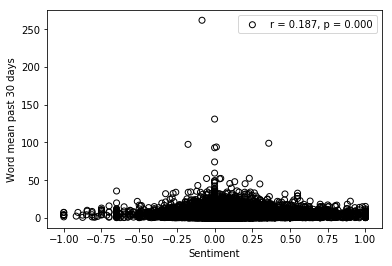

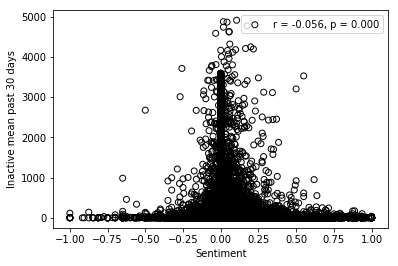

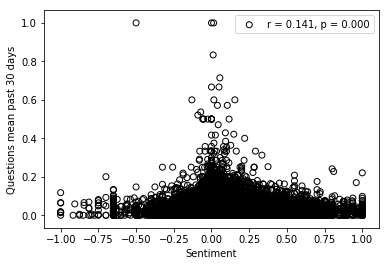

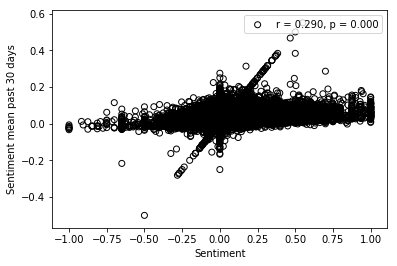

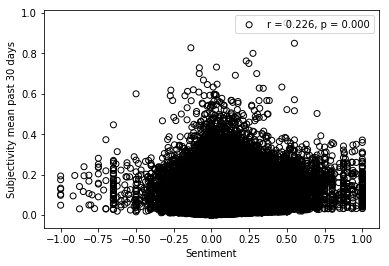

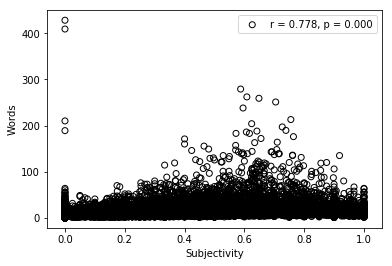

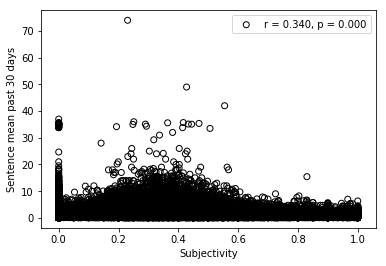

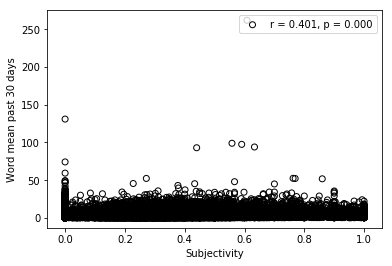

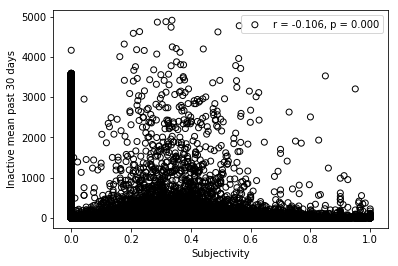

KeyboardInterrupt: 

In [22]:
plt.close()
collist = list(data.columns)
for c in collist:
    x = data[c]
    for d in data:
        if collist.index(d)> collist.index(c)> 2:
            y = data[d]
            plot_correlation(x,y)
            plt.show()